In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

In [2]:
# Load the preprocessed dataset
file_path = "../data/preprocessed_breast_cancer_data.csv"  # Update path if necessary
data = pd.read_csv(file_path)

In [3]:
# Display basic info and check for any remaining missing values
print("Dataset Shape:", data.shape)
print("Missing Values:")
print(data.isnull().sum())

Dataset Shape: (2509, 34)
Missing Values:
Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy         

In [4]:
# Initialize figure settings for better visualization
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
data["Patient's Vital Status"].unique()

array(['Living', 'Died of Disease', 'Died of Other Causes'], dtype=object)

In [7]:
# Ensure the event_observed column is numeric
data["Patient's Vital Status"] = data["Patient's Vital Status"].map({"Living": 0, 
                                                                     "Died of Disease": 1,
                                                                    "Died of Other Causes": 1})

# Check if conversion worked
print(data["Patient's Vital Status"].unique())

[0 1]


### Kaplan-Meier Survival Analysis

The Kaplan-Meier Survival Curve helps visualize the probability of survival over time for different groups.

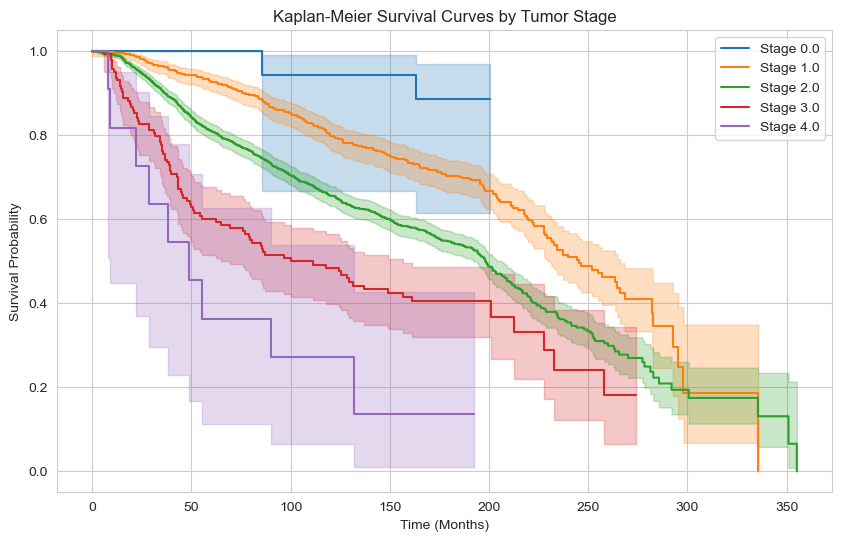

In [8]:
kmf = KaplanMeierFitter()
plt.figure()
for stage in sorted(data['Tumor Stage'].unique()):
    stage_data = data[data['Tumor Stage'] == stage]
    kmf.fit(stage_data['Overall Survival (Months)'], event_observed=stage_data["Patient's Vital Status"])
    kmf.plot(label=f'Stage {stage}')
plt.title("Kaplan-Meier Survival Curves by Tumor Stage")
plt.xlabel("Time (Months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

**Observations**
1. **Stage 0 and 1 have the highest survival probabilities over time**, indicating early detection leads to better survival outcomes.
2. **Stage 3 and 4 show a significant drop**, suggesting that survival chances decrease as the tumor progresses to later stages.
3. **Stage 2 appears to have an intermediate survival curve**, but with a slower decline compared to Stages 3 and 4.
4. **Stage 4 patients have the steepest drop-off**, highlighting the aggressive nature of late-stage cancer.

### Log-Rank Test

The Log-Rank Test is a statistical test used to compare survival distributions between different groups—in this case, **Tumor Stage 1 vs. Tumor Stage 2**.

In [13]:
# Log-Rank Test (Compare survival distributions)
stage_1 = data[data['Tumor Stage'] == 1]['Overall Survival (Months)']
stage_2 = data[data['Tumor Stage'] == 2]['Overall Survival (Months)']
event_1 = data[data['Tumor Stage'] == 1]["Patient's Vital Status"]
event_2 = data[data['Tumor Stage'] == 2]["Patient's Vital Status"]
logrank_result = logrank_test(stage_1, stage_2, event_observed_A=event_1, event_observed_B=event_2)
print("Log-Rank Test between Stage 1 and Stage 2:", logrank_result.p_value)

Log-Rank Test between Stage 1 and Stage 2: 4.807619256559766e-13


**Observations**
- The **Log-Rank Test confirms significant differences** in survival between early-stage (Stage 1) and more advanced-stage (Stage 2) breast cancer patients.
- A **p-value close to zero** indicates that these two groups **do not share the same survival distribution**-suggesting that **tumor stage is a strong predictor of survival**.
- This finding supports the importance of **early diagnosis and intervention**, as survival probability decreases in higher tumor stages.

In [14]:
# Perform Log-Rank Test for multiple tumor stage comparisons
stage_pairs = [(1, 2), (2, 3), (3, 4)]  # Define stage pairs to compare

for stage_A, stage_B in stage_pairs:
    stage_A_data = data[data['Tumor Stage'] == stage_A]['Overall Survival (Months)']
    stage_B_data = data[data['Tumor Stage'] == stage_B]['Overall Survival (Months)']
    event_A = data[data['Tumor Stage'] == stage_A]["Patient's Vital Status"]
    event_B = data[data['Tumor Stage'] == stage_B]["Patient's Vital Status"]
    
    logrank_result = logrank_test(stage_A_data, stage_B_data, event_observed_A=event_A, event_observed_B=event_B)
    
    print(f"Log-Rank Test between Stage {stage_A} and Stage {stage_B}: p-value = {logrank_result.p_value:.5g}")

Log-Rank Test between Stage 1 and Stage 2: p-value = 4.8076e-13
Log-Rank Test between Stage 2 and Stage 3: p-value = 5.6197e-06
Log-Rank Test between Stage 3 and Stage 4: p-value = 0.066291
